<a href="https://colab.research.google.com/github/lexieminton/mas651/blob/main/MAS651_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAS 651 Final Project**
### *HR Analytics - Predicting Attrition*

Lexie Minton, Kiara Serrano, Michelle Jacome

In [ ]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, lasso_path)
%matplotlib inline

In [118]:
# Reading in the data
hr_data = pd.read_csv('HR-Employee-Attrition.csv')
#hr_data = pd.read_csv('https://github.com/lexieminton/mas651/blob/main/HR-Employee-Attrition.csv', header=0, sep='\n', encoding='utf-8') 
                      #names=
                      
                      #['Age', 'Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education',
                             #'EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender',
                             #'HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                             #'MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike',
                             #'PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
                             #'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                             #'YearsWithCurrManager'])

## **Data Exploration**

In [119]:
# Checking the shape of the data
hr_data.shape

(1470, 35)

In [ ]:
# Characteristics of features
characteristics = pd.DataFrame({
    'Unique':hr_data.nunique(),
    'Null':hr_data.isna().sum(),
    'NullPercent':hr_data.isna().sum() / len(hr_data),
    'Type':hr_data.dtypes.values
})
display(characteristics)

,Unique,Null,NullPercent,Type
Age,43,0,0.0,int64
Attrition,2,0,0.0,object
BusinessTravel,3,0,0.0,object
DailyRate,886,0,0.0,int64
Department,3,0,0.0,object
DistanceFromHome,29,0,0.0,int64
Education,5,0,0.0,int64
EducationField,6,0,0.0,object
EmployeeCount,1,0,0.0,int64
EmployeeNumber,1470,0,0.0,int64


In [ ]:
# Describing numcerical variables
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Converting Attrition values to 1 and 0
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Drop feature variables with 1 unique value and employee number
hr_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'JobLevel'], axis=1,inplace=True)

In [ ]:
# Look at numerical variables (23)
num_vars = hr_data.select_dtypes(exclude='O')
num_vars

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
# Look at categorical variables (7)
cat_vars = hr_data.select_dtypes(include='O')
cat_vars

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


## **Exploratory Data Analysis - Visualizations**

In [ ]:
# Exploring attrition
hr_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Attrition')

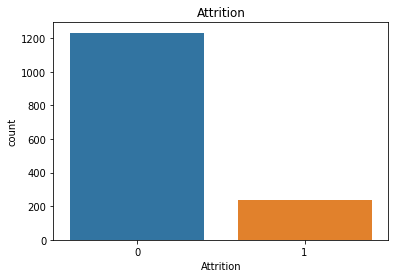

In [ ]:
sns.countplot(hr_data['Attrition'])
plt.title('Attrition')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

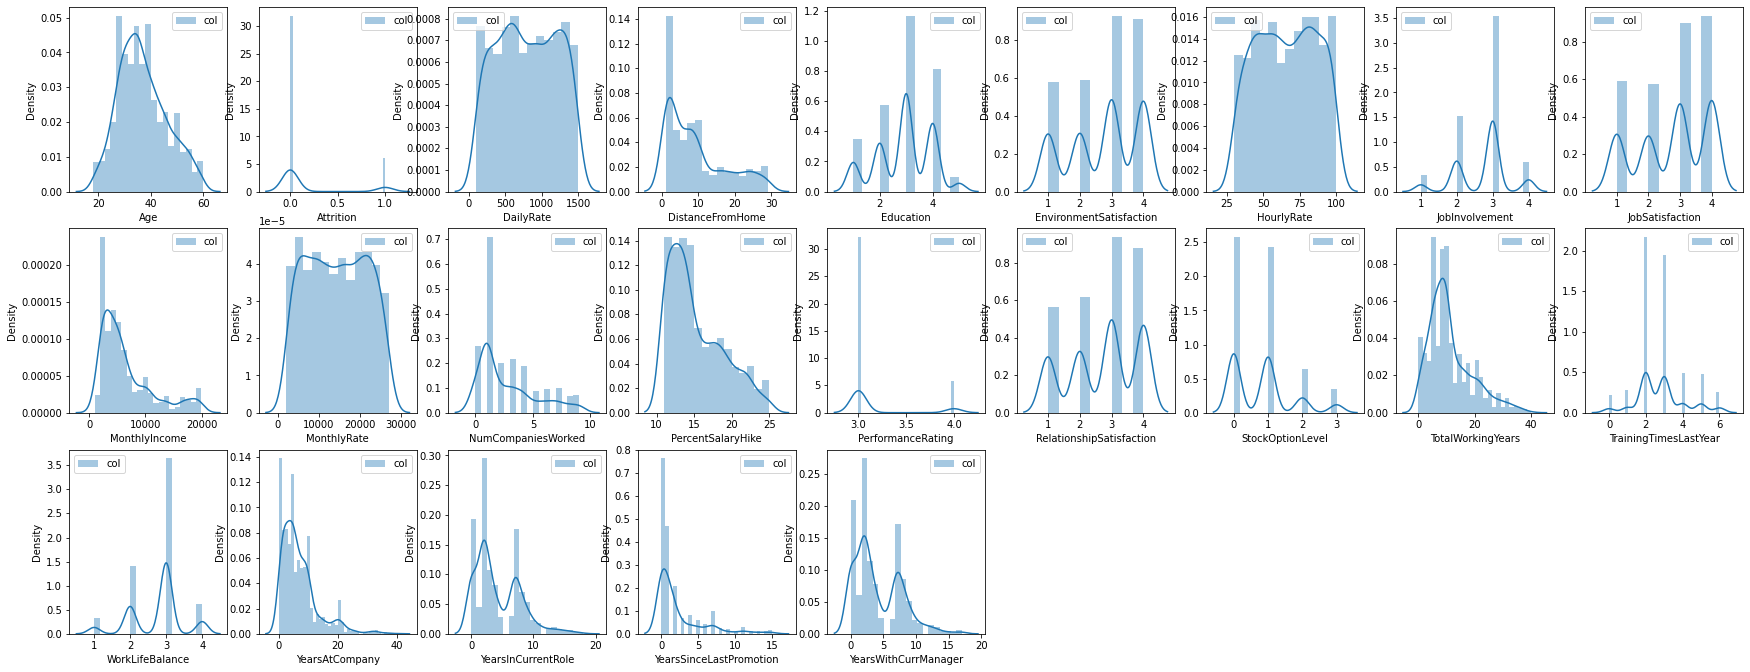

In [ ]:
# Dist plot of numerical variables
plt.figure(figsize=(30,40))

for i,col in enumerate(num_vars.iloc[:,:24].columns):
    plt.subplot(10,9,i+1)
    sns.distplot(num_vars.iloc[:,:24][col],
                 label = 'col')
    
    plt.legend(loc='best')

Text(0, 0.5, 'Proportion of Employees')

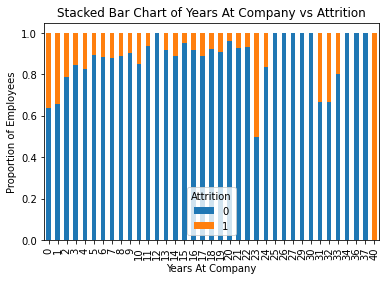

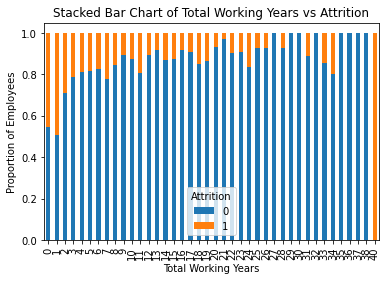

In [ ]:
# Retirement / End of work life filtering
%matplotlib inline

table=pd.crosstab(hr_data.YearsAtCompany,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Years At Company vs Attrition')
plt.xlabel('Years At Company')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.TotalWorkingYears,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Total Working Years vs Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Proportion of Employees')

In [ ]:
# Filtering data to not include 40 years of being at the company and total working years 
hr_data = hr_data.loc[hr_data['YearsAtCompany']<40]
hr_data = hr_data.loc[hr_data['TotalWorkingYears']<40]

Text(0, 0.5, 'Proportion of Employees')

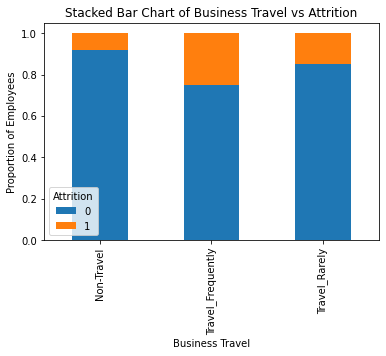

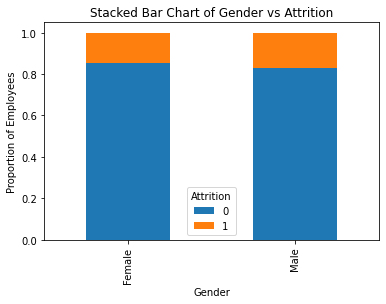

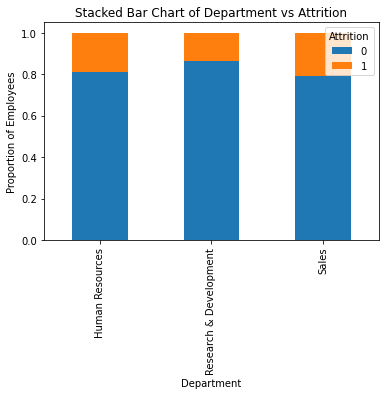

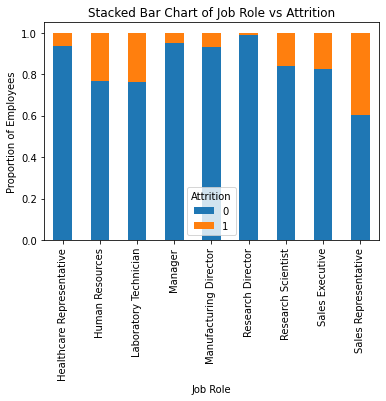

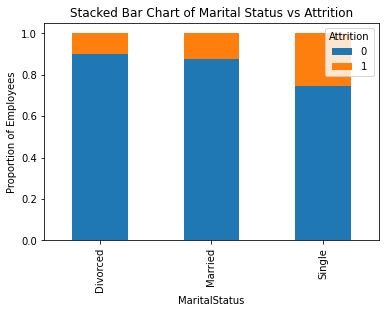

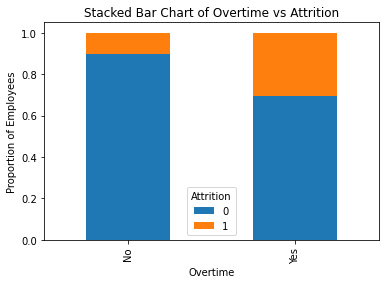

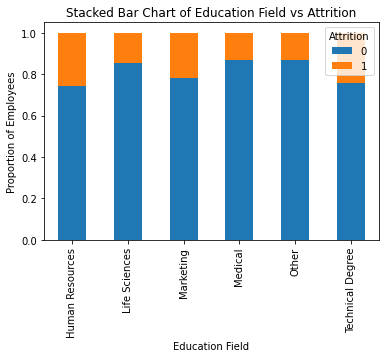

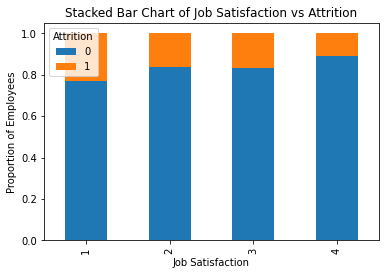

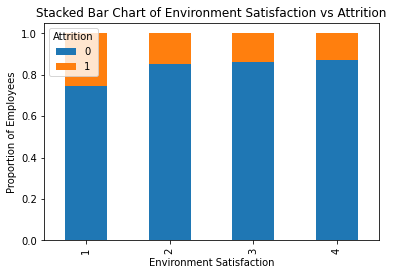

In [ ]:
# Feature Variables vs. Attrition
%matplotlib inline

table=pd.crosstab(hr_data.BusinessTravel,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.Gender,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Attrition')
plt.xlabel('Gender')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.Department,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Department vs Attrition')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.JobRole,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job Role vs Attrition')
plt.xlabel('Job Role')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.MaritalStatus,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Attrition')
plt.xlabel('MaritalStatus')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.OverTime,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.EducationField,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Field vs Attrition')
plt.xlabel('Education Field')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.JobSatisfaction,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Proportion of Employees')

table=pd.crosstab(hr_data.EnvironmentSatisfaction,hr_data.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Environment Satisfaction vs Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Proportion of Employees')


<AxesSubplot:>

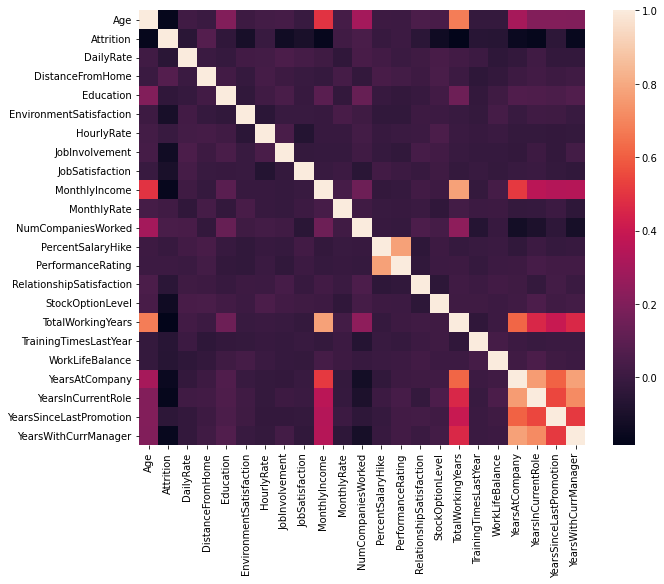

In [ ]:
# Correlation Plot
plt.figure(figsize = (10,8))
sns.heatmap(hr_data.corr())

In [ ]:
# Dropping PercentSalaryHike
hr_data.drop(['PercentSalaryHike'], axis=1,inplace=True)

## **Creating train and test sets**

In [ ]:
# Creating dummy variables for categorical variables
hr_data = pd.get_dummies(hr_data)

In [ ]:
hr_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Creating X and y
X=hr_data.drop(columns=['Attrition'])
y=hr_data[['Attrition']]

In [ ]:
# Creating train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=9)

## **Logistic Regression Model**

In [ ]:
from sklearn import preprocessing

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 9)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=9)

In [ ]:
# Predicting on the logistic regression model
y_pred = logreg.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('The Accuracy for Test Set is {}'.format(test_acc*100))

The Accuracy for Test Set is 88.65979381443299


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[392  13]
 [ 42  38]]


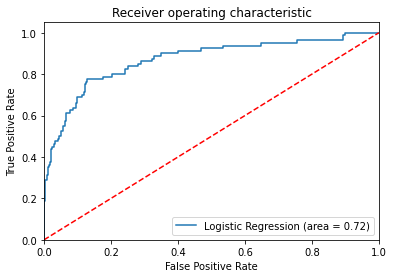

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[-0.21608092 -0.1408892   0.30867832  0.0197527  -0.49994388  0.00233957
 -0.34211356 -0.41343628  0.17338965  0.05950549  0.38623451 -0.07881023
 -0.38894322 -0.42731167 -0.66724119 -0.29174857 -0.24624752  0.00297012
 -0.30739542  0.57928883 -0.18574071 -0.29914685  0.29733079 -0.05356909
 -0.24478367  0.10848514 -0.00492034  0.04987405 -0.09462495  0.07573668
 -0.0608204  -0.09464758  0.24049951 -0.10651758  0.10651758 -0.27611745
  0.33477457  0.29897378 -0.04845501 -0.12144169 -0.8488229  -0.07513257
  0.2301827   0.34433361 -0.14319766 -0.04061888  0.17143202 -0.42302864
  0.42302864]


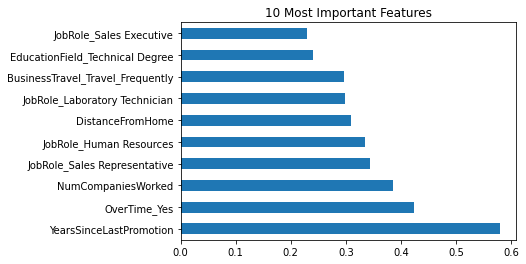

In [ ]:
# 10 highest features
print(logreg.coef_[0]) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(logreg.coef_[0], index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('10 Most Important Features')
plt.show()

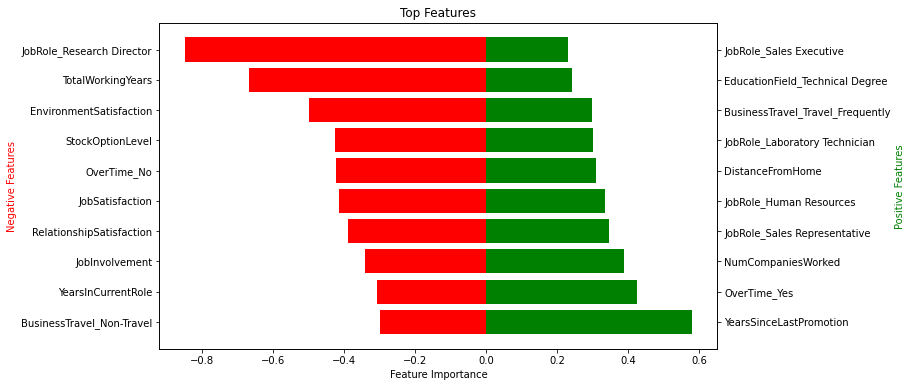

In [ ]:
# Plotting most negative and most positive features on same plot
feature_importance = logreg.coef_[0]

# Sort the features by importance
feature_names = X.columns
sorted_idx = feature_importance.argsort()

# Split the sorted index into positive and negative feature indices
positive_idx = sorted_idx[-10:]
negative_idx = sorted_idx[:10][::-1]

# Plot the most positive and most negative features
n_features = 10
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.barh(range(n_features), feature_importance[negative_idx], color='r')
ax2.barh(range(n_features), feature_importance[positive_idx][::-1], color='g')
ax1.set_yticks(range(n_features))
ax2.set_yticks(range(n_features))
ax1.set_yticklabels(feature_names[negative_idx])
ax2.set_yticklabels(feature_names[positive_idx][::-1])
ax1.set_xlabel('Feature Importance')
ax2.set_xlabel('Feature Importance')
ax1.set_ylabel('Negative Features', color='r')
ax2.set_ylabel('Positive Features', color='g')
plt.title('Top Features')
plt.show()

## **XGBoost Model**

In [ ]:
# Fitting XGBoost model
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
# train_x, test_x, train_Y, test_Y = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12411	validation_0-logloss:0.63536	validation_1-error:0.15258	validation_1-logloss:0.63928
[1]	validation_0-error:0.11801	validation_0-logloss:0.58900	validation_1-error:0.15052	validation_1-logloss:0.59680
[2]	validation_0-error:0.10987	validation_0-logloss:0.55012	validation_1-error:0.15464	validation_1-logloss:0.56060
[3]	validation_0-error:0.11190	validation_0-logloss:0.51636	validation_1-error:0.14639	validation_1-logloss:0.53005
[4]	validation_0-error:0.10885	validation_0-logloss:0.48810	validation_1-error:0.14639	validation_1-logloss:0.50321
[5]	validation_0-error:0.10580	validation_0-logloss:0.46168	validation_1-error:0.14639	validation_1-logloss:0.48152
[6]	validation_0-error:0.10783	validation_0-logloss:0.43890	validation_1-error:0.14433	validation_1-logloss:0.46134
[7]	validation_0-error:0.10580	validation_0-logloss:0.41739	validation_1-error:0.14227	validation_1-logloss:0.44571
[8]	validation_0-error:0.09868	validation_0-logloss:0.39928	validation_1

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-error:0.08647	validation_0-logloss:0.25812	validation_1-error:0.13402	validation_1-logloss:0.34830
[25]	validation_0-error:0.08240	validation_0-logloss:0.25320	validation_1-error:0.13196	validation_1-logloss:0.34682
[26]	validation_0-error:0.08138	validation_0-logloss:0.24785	validation_1-error:0.13402	validation_1-logloss:0.34609
[27]	validation_0-error:0.08444	validation_0-logloss:0.24461	validation_1-error:0.13402	validation_1-logloss:0.34424
[28]	validation_0-error:0.08138	validation_0-logloss:0.24129	validation_1-error:0.13196	validation_1-logloss:0.34358
[29]	validation_0-error:0.08138	validation_0-logloss:0.23713	validation_1-error:0.13196	validation_1-logloss:0.34310
[30]	validation_0-error:0.08037	validation_0-logloss:0.23339	validation_1-error:0.12990	validation_1-logloss:0.34082
[31]	validation_0-error:0.08138	validation_0-logloss:0.22954	validation_1-error:0.12784	validation_1-logloss:0.33957
[32]	validation_0-error:0.08037	validation_0-logloss:0.22621	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Predicting on XGBoost model
y_pred_xgb = model.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.22%


[0.03273287 0.02423245 0.02524057 0.01983706 0.03099327 0.02357434
 0.02983247 0.02666389 0.03422765 0.02232705 0.03031932 0.
 0.03009268 0.05173641 0.0398544  0.02663755 0.02336692 0.0320608
 0.03051886 0.02375539 0.03529486 0.02360647 0.02469341 0.
 0.         0.01659494 0.03415673 0.         0.01559665 0.
 0.         0.         0.0237958  0.01880574 0.         0.
 0.         0.01995957 0.01458627 0.         0.         0.03356265
 0.03176593 0.02477981 0.01835208 0.01331832 0.03818908 0.05493772
 0.        ]


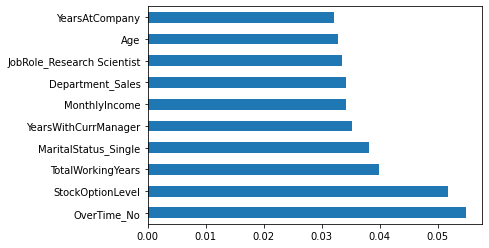

In [ ]:
# 10 highest features
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Grid search to optimize variables
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

#Initialise XGBoost Model
xgb1 = xgb.XGBClassifier(subsample=0.9, objective='binary:logistic')

# Define grid search
grid_search= GridSearchCV(
    estimator=xgb1,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
# want to maximize MSE now

# Fit grid search
model1 = grid_search.fit(X_train,y_train.values.ravel())
print("Best parameters:", model1.best_params_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}


In [ ]:
# Predicting on Grid Search model
from sklearn.metrics import confusion_matrix
predict1 = model1.predict(X_test)
print('Best AUC Score: {}'.format(model1.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict1)))
print(confusion_matrix(y_test,predict1))

Best AUC Score: 0.8234011044176708
Accuracy: 0.8762886597938144
[[398   7]
 [ 53  27]]


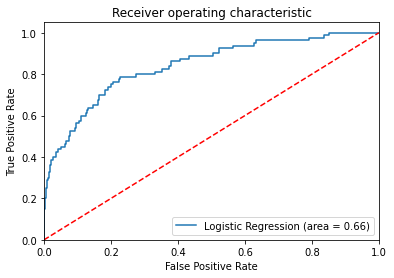

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## **Neural Net Model**

In [ ]:
# Creating neural network model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
modeln = Sequential() 
modeln.add(Dense(600, input_dim=49, activation='sigmoid')) 
modeln.add(Dropout(0.4))
modeln.add(Dense(512, activation='sigmoid'))
modeln.add(Dropout(0.4))
modeln.add(Dense(100, activation='sigmoid'))
modeln.add(Dropout(0.4))
modeln.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling and fitting neural net
modeln.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the training data
modeln.fit(X_train, y_train.values.ravel(), epochs=10, batch_size=20, verbose=2)

Epoch 1/10
50/50 - 5s - loss: 0.4567 - accuracy: 0.8383 - 5s/epoch - 102ms/step
Epoch 2/10
50/50 - 1s - loss: 0.4483 - accuracy: 0.8403 - 624ms/epoch - 12ms/step
Epoch 3/10
50/50 - 1s - loss: 0.4170 - accuracy: 0.8423 - 676ms/epoch - 14ms/step
Epoch 4/10
50/50 - 1s - loss: 0.3552 - accuracy: 0.8616 - 686ms/epoch - 14ms/step
Epoch 5/10
50/50 - 1s - loss: 0.3406 - accuracy: 0.8678 - 624ms/epoch - 12ms/step
Epoch 6/10
50/50 - 1s - loss: 0.3372 - accuracy: 0.8708 - 779ms/epoch - 16ms/step
Epoch 7/10
50/50 - 1s - loss: 0.3329 - accuracy: 0.8769 - 1s/epoch - 22ms/step
Epoch 8/10
50/50 - 1s - loss: 0.3180 - accuracy: 0.8871 - 1s/epoch - 22ms/step
Epoch 9/10
50/50 - 1s - loss: 0.3191 - accuracy: 0.8800 - 1s/epoch - 21ms/step
Epoch 10/10
50/50 - 1s - loss: 0.3184 - accuracy: 0.8759 - 664ms/epoch - 13ms/step


In [ ]:
# Evaluating neural net
score = modeln.evaluate(X_test, y_test.values.ravel(), verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 - 0s - loss: 0.2942 - accuracy: 0.8887 - 427ms/epoch - 27ms/step
Test loss: 0.2942122220993042
Test accuracy: 0.8886597752571106


16/16 [==============================] - 0s 6ms/step


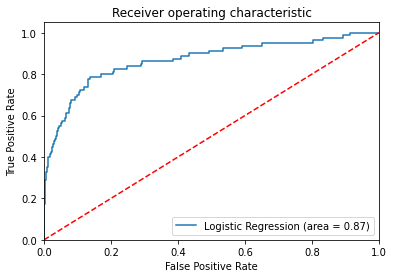

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, modeln.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modeln.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##**Model Comparison**

In [ ]:
# Accuracy Scores
lr_acc = accuracy_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, predict1)
nn_acc = score[1]

In [ ]:
# AUC scores
lr_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])
nn_auc = roc_auc_score(y_test, modeln.predict(X_test))

16/16 [==============================] - 0s 18ms/step


In [ ]:
# Model Comparison Table
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Neural Network'],
    'Accuracy': [lr_acc, xgb_acc, nn_acc],
    'AUC': [lr_auc, xgb_auc, nn_auc]
})
print(results_df)

                 Model  Accuracy       AUC
0  Logistic Regression  0.886598  0.868889
1              XGBoost  0.876289  0.840185
2       Neural Network  0.888660  0.867994
